# Installation des librairies

In [3]:
!pip install numpy

  Using cached numpy-1.25.2-cp39-cp39-win_amd64.whl (15.6 MB)


You should consider upgrading via the 'C:\Users\33767\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [21]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/2d/30/3afb8bcb785653254eb646ff2680ec4d637b40b06f4b046aca17b5e086b0/scikit_learn-1.3.0-cp39-cp39-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.0-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/e9/20/2d0561ab54d857365926c5b53538369a7b8d6ccbffaca509305b074028cd/scipy-1.11.2-cp39-cp39-win_amd64.whl.metadata
  Using cached scipy-1.11.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca7

In [23]:
!pip install nltk


     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.1/1.5 MB 1.3 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.5 MB 1.3 MB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.5 MB 1.3 MB/s eta 0:00:02
     ------ --------------------------------- 0.2/1.5 MB 1.3 MB/s eta 0:00:01
     -------- ------------------------------- 0.3/1.5 MB 1.4 MB/s eta 0:00:01
     -------- ------------------------------- 0.3/1.5 MB 1.4 MB/s eta 0:00:01
     ----------- ---------------------------- 0.5/1.5 MB 1.4 MB/s eta 0:00:01
     ------------- -------------------------- 0.5/1.5 MB 1.4 MB/s eta 0:00:01
     --------------- ------------------------ 0.6/1.5 MB 1.4 MB/s eta 0:00:01
     ----------------- ---------------------- 0.6/1.5 MB 1.4 MB/s eta 0:00:01
     ----------------- ---------------------- 0.7/1.5 MB 1.4 MB/s eta 0:00:01
     ------------------- -------------------- 0.7/1.5 MB 1.4 MB/s eta 0

In [28]:
import spacy


In [29]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
import string
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter(action='ignore')
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('words')
import spacy
nlp = spacy.load("en_core_web_sm")
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\33767\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\33767\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\33767\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\33767\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\33767\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


# Lecture des données

In [33]:
df0 = pd.read_csv("c:/Users/33767/Downloads/archive/national_anthems.csv", encoding='utf-8')
print(df0.info())
df0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    190 non-null    object
 1   Alpha-2    189 non-null    object
 2   Alpha-3    190 non-null    object
 3   Continent  190 non-null    object
 4   Anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.5+ KB
None


,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."


Le fichier csv `anthems.csv` comporte une table de 190 lignes et 5 colonnes stockée en mémoire avec un poids de 7.5 KB. Il n'y a aucune valeur manquante et toutes les variables sont de type *string* ; ce sont toutes des variables qualitatives. 

**Dictionnaire de données :**
* **Country :** Nom complet du pays (*e.g.* Albania, France)
* **Alpha-2 :** Code ID du pays au format AA (*e.g.* Armenia pour AM, Belarus pour BY)
* **Alpha-3 :** Code ID du pays au format AAA (*e.g.* Armenia pour ARM, Belarus pour BLR)
* **Continent :** Nom complet du continent dans lequel se trouve le pays (*e.g.* France pour Europe, Canada pour Amérique)
* **Anthem :** Hymne nationale du pays 

# Création de la table de travail
Le stockage d'objet string est extrêmement coûteux en mémoire. Aussi, pour réaliser des analyses sur la variable `Anthem` uniquement nous décidons de créer deux tableaux. Le premier comportera les données de localisation et le second possédera la variable d'analyse. 

Lorsque nous réaliserons d'autres analyses, il sera utile de pouvoir récupérer les données de chaque tableau, il nous faut donc déterminer une clef ; pour cela nous avons besoin d'une variable comportant des données unique (*i.e.* sans doublon).

In [34]:
print("Nombre de doublon dans Alpha-2 :", df0["Alpha-2"].duplicated().sum())
print("")
print("Nombre de doublon dans Alpha-3 :", df0["Alpha-3"].duplicated().sum())

Nombre de doublon dans Alpha-2 : 1

Nombre de doublon dans Alpha-3 : 0


Au regard, de nos résultats, nous décidons de sélectionner la variable `Alpha-3`.

In [35]:
df1 = df0.drop(["Country", "Alpha-2", "Continent"], axis = 1)
tab_ref = df0.drop(["Anthem"], axis = 1)

In [36]:
print("Nom de colonnes de la table d'analyse : ", df1.columns)
print("Nom de colonnes de la table de référence : ", tab_ref.columns)

Nom de colonnes de la table d'analyse :  Index(['Alpha-3', 'Anthem'], dtype='object')
Nom de colonnes de la table de référence :  Index(['Country', 'Alpha-2', 'Alpha-3', 'Continent'], dtype='object')


# Nettoyage de la variable *Anthem*

In [37]:
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

In [38]:
def clean_data_text(df, col_name):
    
    for row in range(len(df)):
        
        df.loc[row, col_name] = "".join([i.lower() for i in df.loc[row, col_name] if i not in string.punctuation]) #supprime la ponctuation et majuscule -> minuscule
        df.loc[row, col_name] = re.sub(r'[0-9]', '', df.loc[row, col_name]) #supprime les chiffres
        df.loc[row, col_name] = re.sub(r'\W|_', ' ', df.loc[row, col_name]) #supprime les caractères non alphanumérique et underscore
        df.loc[row, col_name] = re.sub(r'\s+', ' ', df.loc[row, col_name]) #supprime les doubles espaces
        df.loc[row, col_name] = re.sub(r'^\s|\s$', '', df.loc[row, col_name]) #supprime les espaces au début et fin du texte
        df.loc[row, col_name] = re.sub(r'\s+[a-zA-Z]\s+', ' ', df.loc[row, col_name]) #supprime les lettres isolées
        df.loc[row, col_name] = re.sub(r'^b\s+', ' ', df.loc[row, col_name]) #supprime les b isolés en début de ligne
        
        tokenize_phrase = nltk.tokenize.word_tokenize(df.loc[row, col_name]) #chaque caractère isolés par des espaces devient l'élément d'une liste
        df.loc[row, col_name] = [i for i in tokenize_phrase if i not in stopwords] #supprime les mots les plus courrants avec peu d'importance (ex:'our')

    return df 

In [39]:
df1 = clean_data_text(df1, "Anthem")
df1.head(3)

,Alpha-3,Anthem
0,ALB,"[around, flag, stand, united, one, wish, one, ..."
1,ARM,"[fatherland, free, independent, centuries, liv..."
2,AUT,"[land, mountains, land, river, land, fields, l..."


In [40]:
print('Phrase de base : ', df0['Anthem'][0])
print("")
print('Phrase nettoyée : ', df1["Anthem"][0])

Phrase de base :  Around our flag we stand united, With one wish and one goal, A sacred oath we bestow upon it Proclaiming loyalty for our salvation. From war abstains only he, Who a traitor is born, He who is a true man is not frightened, But dies a warrior to the cause. With weapons in our hands a-brandished, We will defend our fatherland, Our sacred rights weÃ¢â‚¬â„¢ll not relinquish, The foe has no place in our land. For God himself proclaimed The nations of the earth shall wane, And yet will live, will thrive Albania. For you, for you we fight. O Flag, flag, you sacred symbol Upon you we now swear For Albania, our dear fatherland For honour and your glory. Brave man is named and honoured The one who sacrificed himself for the fatherland Forever he will be remembered On earth and under as a saint!

Phrase nettoyée :  ['around', 'flag', 'stand', 'united', 'one', 'wish', 'one', 'goal', 'sacred', 'oath', 'bestow', 'upon', 'proclaiming', 'loyalty', 'salvation', 'war', 'abstains', 'trai

# Lemmatisation de la variable Anthem

In [41]:
def lemmatize_df(df, col_name):
    
    df1 = df.copy()
    df1[col_name] = df1[col_name].astype(str)
    df1[col_name] = df1[col_name].apply(lambda text: " ".join([token.lemma_ for token in nlp(text)]))
    
    return df1

In [42]:
df2 = df1.copy()
df2 = lemmatize_df(df2, "Anthem")

print("Types associés aux mots de la première hymne :")
print("")
print(df2["Anthem"][0])

Types associés aux mots de la première hymne :

[ ' around ' , ' flag ' , ' stand ' , ' united ' , ' one ' , ' wish ' , ' one ' , ' goal ' , ' sacred ' , ' oath ' , ' bestow ' , ' upon ' , ' proclaim ' , ' loyalty ' , ' salvation ' , ' war ' , ' abstain ' , ' traitor ' , ' bear ' , ' true ' , ' man ' , ' frightened ' , ' die ' , ' warrior ' , 'cause ' , ' weapon ' , ' hand ' , ' abrandishe ' , ' defend ' , ' fatherland ' , ' sacred ' , ' right ' , ' weã ' , ' â ' , ' â ' , ' relinquish ' , ' foe ' , ' place ' , ' land ' , ' god ' , ' proclaim ' , ' nation ' , ' earth ' , ' shall ' , ' wane ' , ' yet ' , ' live ' , ' thrive ' , ' albania ' , ' fight ' , ' flag ' , ' flag ' , ' sacred ' , ' symbol ' , ' upon ' , ' swear ' , ' albania ' , ' dear ' , ' fatherland ' , ' honour ' , ' glory ' , ' brave ' , ' man ' , ' name ' , ' honour ' , ' one ' , ' sacrifice ' , ' fatherland ' , ' forever ' , ' remember ' , ' earth ' , ' saint ' ]


# Grammaire de la variable Anthem

In [44]:
df2_type = df2.copy()
df2_type = df2_type["Anthem"].apply(lambda x: type_mot(x))

print("Types associés aux mots de la première hymne :")
print("")
print(df2_type[0])

Types associés aux mots de la première hymne :

[[([, 'X')], [( , 'SPACE')], [(', 'PUNCT')], [( , 'SPACE')], [(a, 'PRON')], [(r, 'X')], [(o, 'X')], [(u, 'NOUN')], [(n, 'CCONJ')], [(d, 'X')], [( , 'SPACE')], [(', 'PUNCT')], [( , 'SPACE')], [(,, 'PUNCT')], [( , 'SPACE')], [(', 'PUNCT')], [( , 'SPACE')], [(f, 'X')], [(l, 'NOUN')], [(a, 'PRON')], [(g, 'PROPN')], [( , 'SPACE')], [(', 'PUNCT')], [( , 'SPACE')], [(,, 'PUNCT')], [( , 'SPACE')], [(', 'PUNCT')], [( , 'SPACE')], [(s, 'NOUN')], [(t, 'NOUN')], [(a, 'PRON')], [(n, 'CCONJ')], [(d, 'X')], [( , 'SPACE')], [(', 'PUNCT')], [( , 'SPACE')], [(,, 'PUNCT')], [( , 'SPACE')], [(', 'PUNCT')], [( , 'SPACE')], [(u, 'NOUN')], [(n, 'CCONJ')], [(i, 'PRON')], [(t, 'NOUN')], [(e, 'X')], [(d, 'X')], [( , 'SPACE')], [(', 'PUNCT')], [( , 'SPACE')], [(,, 'PUNCT')], [( , 'SPACE')], [(', 'PUNCT')], [( , 'SPACE')], [(o, 'X')], [(n, 'CCONJ')], [(e, 'X')], [( , 'SPACE')], [(', 'PUNCT')], [( , 'SPACE')], [(,, 'PUNCT')], [( , 'SPACE')], [(', 'PUNCT')], [( , 'SPA

# Vectorisation de la variable

In [52]:
def text_vectorization(data, col, size):
    tfidf_vect = TfidfVectorizer(analyzer='word', max_features=size)
    
    X = tfidf_vect.fit_transform(data[col].apply(lambda x: ' '.join(eval(x))))
    
    data_text = pd.DataFrame(X.toarray(), columns=tfidf_vect.get_feature_names_out())
    data = pd.concat([data, data_text], axis=1)
    data.drop([col], axis=1, inplace=True)
    
    return data

In [53]:
df3= df2.copy()
df3= text_vectorization(df3, "Anthem", size=600)
df3.head()

,Alpha-3,achieve,across,adore,adorn,advance,africa,age,ah,air,...,would,write,year,yes,yet,yoke,you,young,zambia,zealand
0,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.126498,0.0,0.0,0.000000,0.0,0.0
1,ARM,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,AUT,0.0,0.0,0.0,0.0,0.0,0.0,0.198674,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,AZE,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.073966,0.0,0.0
4,BLR,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


# Identification du nombre optimal de mots à étudier

## PCA et Kaiser : *identifie les variables les plus importantes ou celles expliquant 95% de la variance*

In [54]:
def optimal_dimensions(df, drop_column):
    X = df.drop([drop_column], axis=1)
    pca = PCA()
    X_pca = pca.fit_transform(X)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(explained_variance >= 0.95) + 1
    
    n_components_kaiser = np.sum(pca.explained_variance_ > 1.0/len(X.columns))

    return n_components, n_components_kaiser

In [56]:
n_components, n_components_kaiser = optimal_dimensions(df3, 'Alpha-3')
print("Nombre optimal de dimensions (PCA) :", n_components)
print("Nombre optimal de dimensions (Kaiser) :", n_components_kaiser)

Nombre optimal de dimensions (PCA) : 153
Nombre optimal de dimensions (Kaiser) : 160


## Re-Vectorisation avec le nombre optimal de dimension pour réduire les données

In [57]:
df4= df2.copy()
df4= text_vectorization(df4, "Anthem", size=153)
df4.head()

,Alpha-3,africa,always,ancestor,arise,arm,banner,battle,bear,beautiful,...,voice,vow,war,warrior,wave,we,well,work,world,year
0,ALB,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.134555,0.000000,...,0.0,0.0,0.132391,0.150783,0.000000,0.000000,0.0,0.0,0.0,0.0
1,ARM,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.117449,0.0,0.0,0.0,0.0
2,AUT,0.0,0.0,0.184601,0.0,0.0,0.000000,0.000000,0.193472,0.176917,...,0.0,0.0,0.000000,0.000000,0.000000,0.179658,0.0,0.0,0.0,0.0
3,AZE,0.0,0.0,0.000000,0.0,0.0,0.203387,0.100117,0.000000,0.000000,...,0.0,0.0,0.000000,0.115821,0.097186,0.047988,0.0,0.0,0.0,0.0
4,BLR,0.0,0.0,0.000000,0.0,0.0,0.248192,0.244344,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


# Clustering de la variable Anthem

## Création des clusters

In [58]:
def get_silhouette_scores(data, max_k):
    scores = []
    
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        score = silhouette_score(data, kmeans.labels_)
        scores.append(score)
    
    return scores

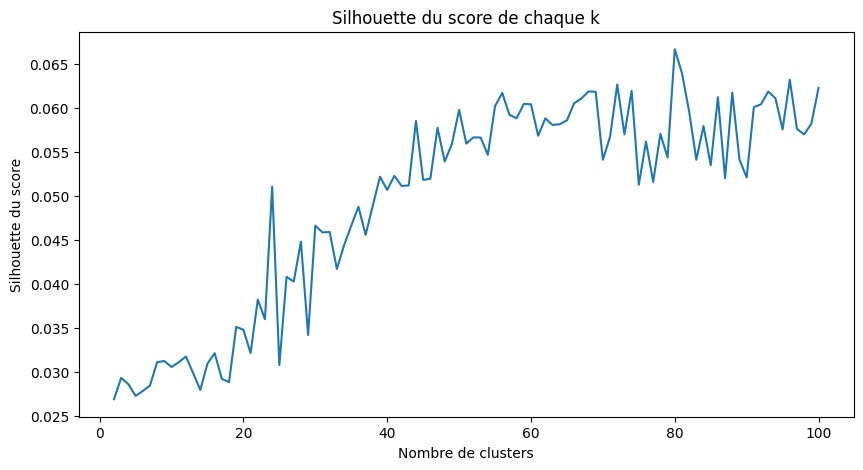

In [59]:
max_k = 100

df4_num = df4.drop("Alpha-3", axis= 1)

df4_array = df4_num.values
scores = get_silhouette_scores(df4_array, max_k)

plt.figure(figsize=(10,5))

plt.plot(range(2, max_k+1), scores)

plt.title("Silhouette du score de chaque k")
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette du score")

plt.show()

In [60]:
n_clusters = np.argmax(scores) + 2  # Nombre optimal de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df4_array)
labels = kmeans.labels_

print("Nombre optimal de clusters: ", n_clusters)
print("Labels des clusters: ", labels)

Nombre optimal de clusters:  80
Labels des clusters:  [ 9 25  6 21 75 47 52 79 58  4  7 57 15 31 39 49 15  4 54 28 50 25 35 15
 10 36 34 52 55 29 28 37 39 32 14 15 21 53 37  3  9 12 36  0 63 25 12 11
 59 20  6 20 42 72 41 17  7 60 15 11 63  2 20 18  1 21 57 67 69 58 33 71
 18 52 16 33 14 62 16  8  2 68 68 73 16 77 48 17 16 12 52 47 70 10  0  8
 23 21  6 65 22 31 28 47 26 26 58 17 26 23 10 44 26 46 46 19 27 76 51 21
 40 47  2  6 44 69  3 59 37 43 26 43 71 37  3 17 30 38 59 64 21 53 61 30
 16  8 48 22 56 66  8  2  1 33 13 69 21 33 58  4 68 35 33 13 24 14 42 19
 26  8 33  8 56 16 17 13 45 14  5 27  5 11 29 35  2 74 38 78 49 58]


## Identification des mots significatifs dans chaque cluster

In [61]:
df4['Cluster'] = labels

for i in range(n_clusters):
    print(f"\nCluster {i}:")
    cluster_hymne = df4[df4['Cluster']==i]

    cluster_words = df4.loc[df4['Cluster']==i].drop(columns=['Alpha-3', 'Cluster']).sum().sort_values(ascending=False)
    print(f"\nMots les plus fréquents par cluster {i}:")
    print(cluster_words[:10])


Cluster 0:

Mots les plus fréquents par cluster 0:
save       1.098964
god        0.619250
long       0.409456
thy        0.400920
upon       0.353825
king       0.341330
joy        0.311153
eternal    0.302829
life       0.281354
one        0.265001
dtype: float64

Cluster 1:

Mots les plus fréquents par cluster 1:
keep       0.541817
peace      0.527547
great      0.513435
ever       0.456429
justice    0.402101
good       0.370598
day        0.349301
let        0.345473
man        0.338068
true       0.297144
dtype: float64

Cluster 2:

Mots les plus fréquents par cluster 2:
let          2.433125
we           1.976448
may          0.654280
come         0.631708
happiness    0.577176
ancestor     0.550225
hand         0.465060
rise         0.442356
spirit       0.440773
new          0.434575
dtype: float64

Cluster 3:

Mots les plus fréquents par cluster 3:
live          1.142796
flag          0.662577
long          0.609956
fatherland    0.538242
future        0.515934
glory       

# Diminution des dimensions pour visualiser les clusters

In [62]:
features = df4.drop(columns=['Alpha-3', 'Cluster']).values

In [63]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

clusters = df4['Cluster'].values

df_visualize = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2'])
df_visualize['Cluster'] = clusters

In [65]:
import matplotlib.cm as cm
num_clusters = len(df_visualize['Cluster'].unique())

colors = cm.get_cmap('tab10', num_clusters)

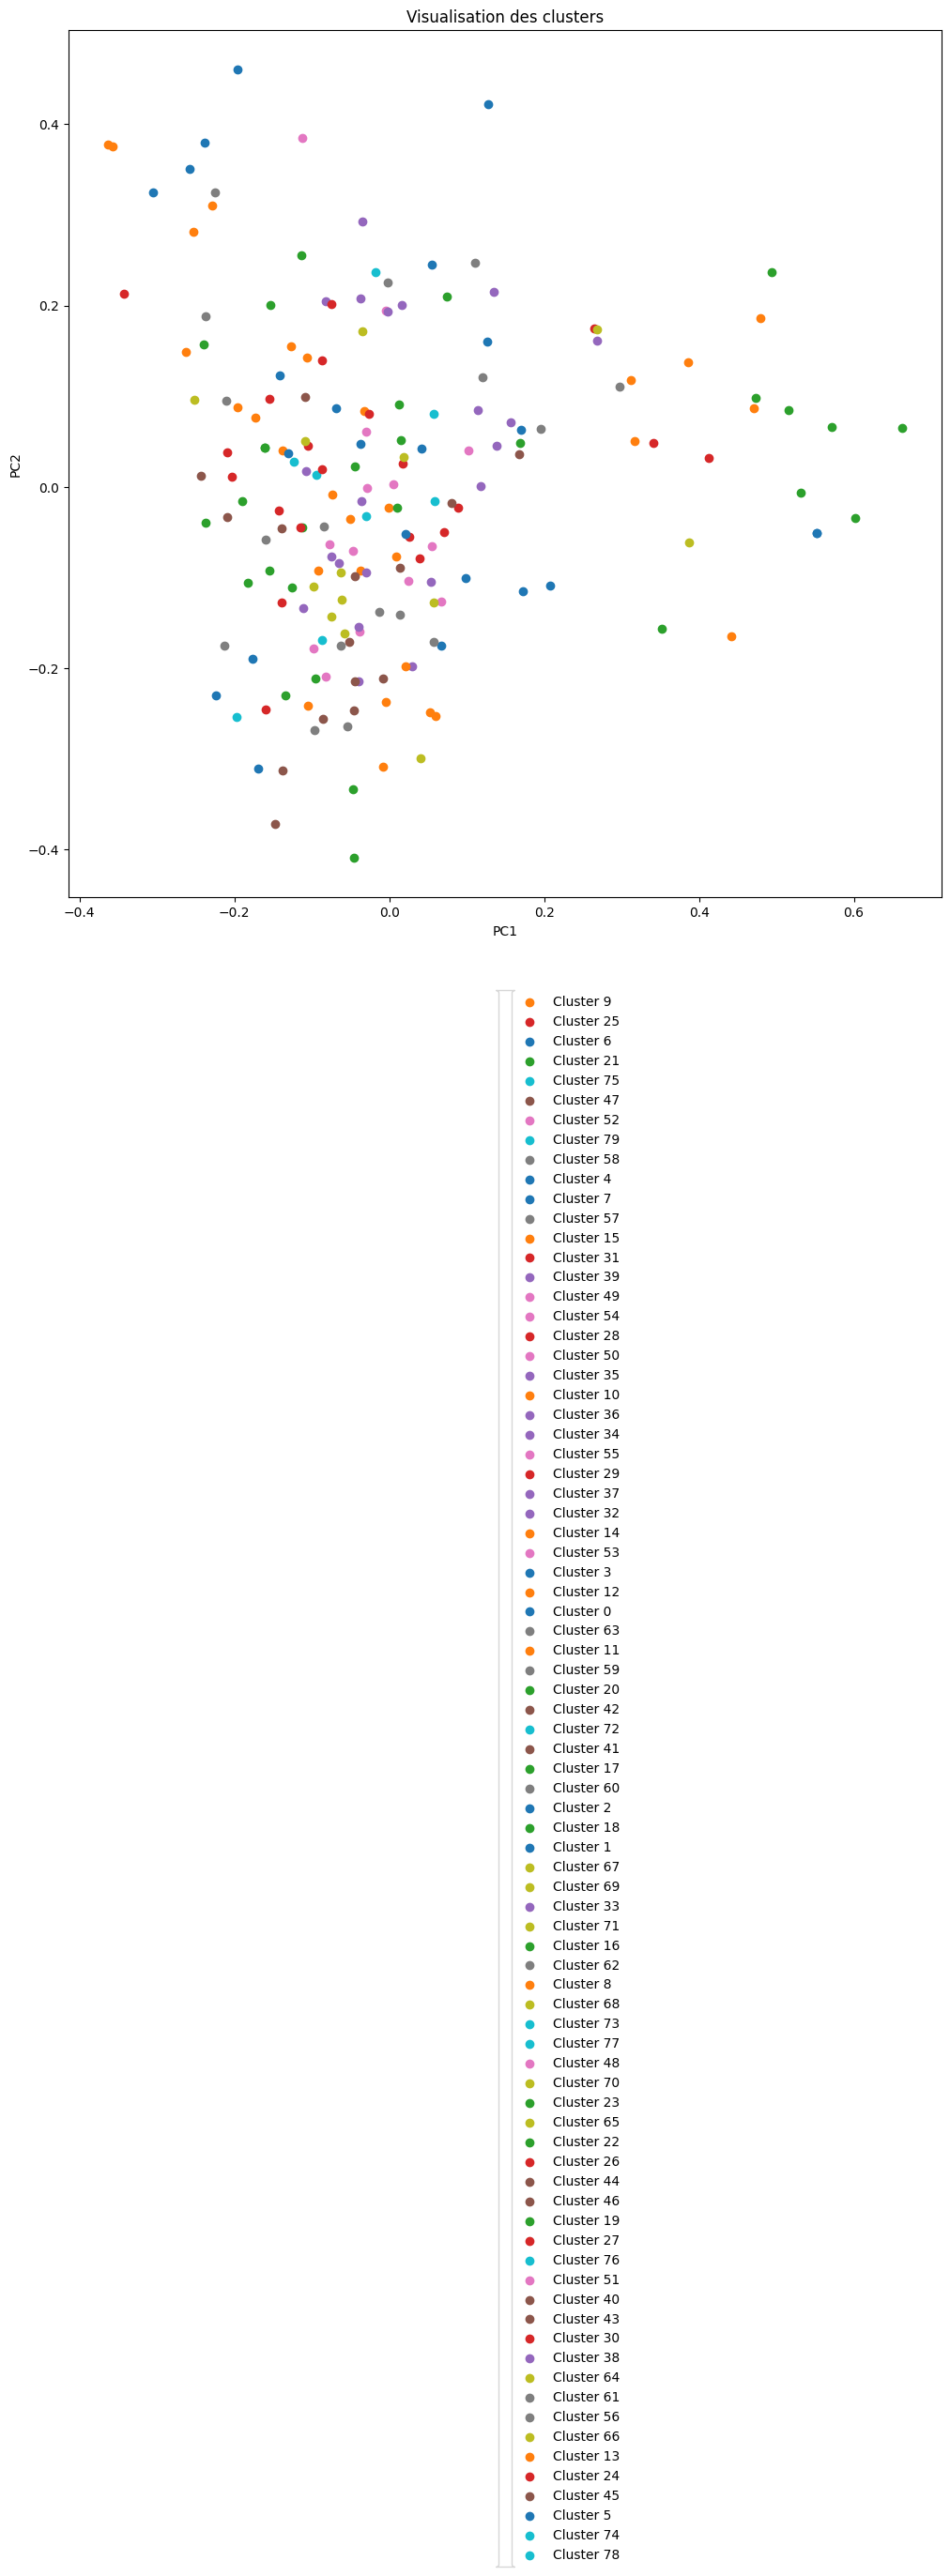

In [66]:
plt.figure(figsize=(12, 12))

for cluster in df_visualize['Cluster'].unique():
    df_cluster = df_visualize[df_visualize['Cluster'] == cluster]
    plt.scatter(df_cluster['PC1'], df_cluster['PC2'], color=colors(cluster), label=f'Cluster {cluster}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisation des clusters')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1, mode='expand')

plt.show()

In [67]:
distance_matrix = pdist(df_visualize[['PC1', 'PC2']], metric='euclidean') #Matrice des distances de type euclidienne

In [68]:
linkage_matrix = linkage(distance_matrix, method='average') #Regroupement hiérarchique
clusters = fcluster(linkage_matrix, t=10, criterion='maxclust') #définition du nombre de cluster dans chaque regroupement

In [69]:
df_visualize['Merged_Cluster'] = clusters
color_map = plt.get_cmap('tab10')
merged_cluster_labels = df_visualize['Merged_Cluster'].unique()

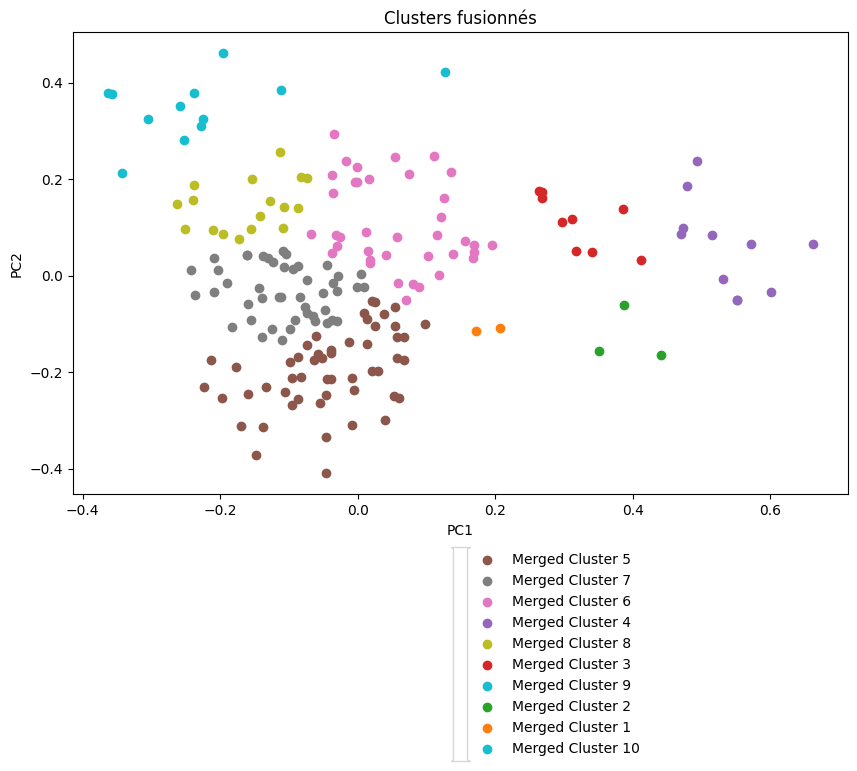

In [70]:
plt.figure(figsize=(10,6))

for merged_cluster in merged_cluster_labels:
    df_merged_cluster = df_visualize[df_visualize['Merged_Cluster'] == merged_cluster]
    plt.scatter(df_merged_cluster['PC1'], df_merged_cluster['PC2'], color=color_map(merged_cluster), label=f'Merged Cluster {merged_cluster}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters fusionnés')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1, mode='expand')

plt.show()